<a href="https://colab.research.google.com/github/nambiar/MachineLearning/blob/master/Session7/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

2.0.0


Tensorflow 1.15.0 installed so installing tensorflow 2.0

In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow==2.0.0
import tensorflow as tf

     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 36.3MB/s 
     |████████████████████████████████| 450kB 35.3MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


Always tf.keras as tf.python.keras is for experimental and fixing bugs and will not work properly

[Source](https://https://stackoverflow.com/questions/58279628/what-is-the-difference-between-tf-keras-and-tf-python-keras)

In [0]:
#!pip uninstall tensorflow
#!pip install tensorflow==2.0.0
from keras import backend as K
from tensorflow import keras
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
from keras.utils import to_categorical
import matplotlib.pyplot as plt
np.random.seed(2017) 
#from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, SeparableConv2D
#from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras import utils
#keras.utils.plot_model
from tensorflow.keras.utils import plot_model
#from tensorflow.keras.utils import  np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#tf.keras.utils.to_categorical
#from tensorflow.python.keras import np_utils
#importing image normalisation class
#from tensorflow.keras.im import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import GlobalAveragePooling2D

Using TensorFlow backend.


In [0]:
!pip install np-utils

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


`ENAS Architecture on CIFAR-10`

---


ENAS = Efficient Neural Architecture Search via Parameter Sharing

ENAS gave the following Architecture for CIFAR-10

![alt text](https://2.bp.blogspot.com/-HQo2Kx39Q6A/WsqZQn5pJHI/AAAAAAAAVhY/FBkgOeS06vQNvZN2KI2hhGZmfS1cNPg8wCLcBGAs/s1600/enasdiscoverednetwork.png)

Use functional API to design the network

Sep Stands for Depthwise separable 2D convolution

Also adding BN after each layer which is before max pool



Download and prepare the data

Analyze size and reshape if any 

In [0]:
#Download the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())


170500096/170498071 [==============================] - 4s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)
Train 0 255 120.70756512369792 64.1500758911213
Test 0 255 121.52915475260417 64.06097012299574


First print the image and change the type for pixel value to float 32 

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
#plt.imshow(x_train[1])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Find the number of unique outputs and convert to one hot encoding

In [0]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
y_train[:10]
plt
#np_utils to utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train[0])
#y_train[:10]

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Original label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Create a data generating mechanism for training and validation

Using 50% of test datset for validation


In [0]:
# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (x_train.min(), x_train.max()))
print('Test min=%.3f, max=%.3f' % (x_test.min(), x_test.max()))
#Rescaling argument to a ratio by which each pixel can be multiplied to achieve [1 -255] range so 1/255.
# create generator with rescaling factor(1.0/255.0 = 0.003921568627451)
imagenormalize = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
print(x_train.shape)
imagenormalize.fit(x_train)
print(imagenormalize.mean)
#print('Data Generator mean=%.3f, std=%.3f' % (imagenormalize.mean, imagenormalize.std))
#iterators for using the normalisation on all the images in test and train datasets with epoch's
X_train_iterator = imagenormalize.flow(x_train, y_train, batch_size=128)

X_validate_iterator = imagenormalize.flow(x_test[:5000], y_test[:5000], batch_size=128)
X_test_iterator = imagenormalize.flow(x_test[5001:], y_test[5001:], batch_size=128)
#confimring normalisation works


print('Batches train=%d, test=%d' % (len(X_train_iterator), len(X_test_iterator)))
# confirm the scaling works
#test_trainX, test_trainY = X_train_iterator.next()
#print('Batch shape=%s, min=%.3f, max=%.3f, mean=%.3f, std=%.3f' % (test_trainX.shape, test_trainX.min(), test_trainX.max(),test_trainX.mean(), test_trainX.std()))
# demonstrate effect on entire training dataset
#iterator = imagenormalize.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)
# get a batch
#test_trainX, test_trainY = X_train_iterator.next()
# pixel stats in the batch
#print(test_trainX.shape, test_trainX.mean(), test_trainX.std())
#Also adding the  l2 regularisation it reduces the accuracy from

Train min=0.000, max=255.000
Test min=0.000, max=255.000
(50000, 32, 32, 3)
[[[125.3069  122.95015 113.866  ]]]
Batches train=391, test=40


We need to merge 2 layers of different sizes 

for example if we directly concat the 2 layers of different size we get

A `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 16, 16, 32), (None, 32, 32, 32)]

In [0]:
def LayerResize(SkipConnectionLayer, LayersToConcatenate):
  SkipConnectionLayers =  [SkipConnectionLayer]
  for layers in LayersToConcatenate:
    k = SkipConnectionLayer.get_shape().as_list()
    l = layers.get_shape().as_list()
    """print ("the change from") 
    print (l) 
    print ("to") 
    print(k)"""
    factor_1 = k[1]/l[1]
    factor_2 = k[2]/l[2]
    l[1] = int(l[1]*factor_1)
    l[2] = int(l[2]*factor_2)
    l[3] = int(l[3]*1/factor_1*1/factor_2)
    shape = [ tf.shape(layers)[index] for index in range(4)]
    shape[1] = l[1]
    shape[2] = l[2]
    shape[3] = l[3]
    printShape(layers)
    Y = tf.reshape(layers, shape)
    SkipConnectionLayers.append(Y)
  MergedLayer = concatenate(SkipConnectionLayers)
  return MergedLayer

Model design as per the above mentioned architecture using functional API 

In [0]:
def printShape(layer):
  print((layer.name) + ":" )
  print(layer.get_shape().as_list())


L1_sep_5x5_1/Identity:0:
[None, 32, 32, 32]
L1_con_5x5_2/Identity:0:
[None, 32, 32, 32]
L1_sep_5x5_1/Identity:0:
[None, 32, 32, 32]
L1_sep_5x5_2/Identity:0:
[None, 32, 32, 32]
L2_sep_3x3_1/Identity:0:
[None, 16, 16, 32]
L2_sep_3x3_1/Identity:0:
[None, 16, 16, 32]
L1_sep_5x5_1/Identity:0:
[None, 32, 32, 32]
L1_sep_5x5_2/Identity:0:
[None, 32, 32, 32]
L2_con_5x5_1/Identity:0:
[None, 16, 16, 32]
L1_sep_5x5_2/Identity:0:
[None, 32, 32, 32]
L2_sep_3x3_2/Identity:0:
[None, 16, 16, 32]
L2_sep_3x3_1/Identity:0:
[None, 16, 16, 32]
L1_sep_5x5_2/Identity:0:
[None, 32, 32, 32]
L1_sep_5x5_1/Identity:0:
[None, 32, 32, 32]
L2_con_5x5_1/Identity:0:
[None, 16, 16, 32]
L2_sep_3x3_2/Identity:0:
[None, 16, 16, 32]
L1_con_5x5_1/Identity:0:
[None, 32, 32, 32]
L1_sep_5x5_1/Identity:0:
[None, 32, 32, 32]
L3_con_5x5_1/Identity:0:
[None, 16, 16, 32]
L1_con_5x5_1/Identity:0:
[None, 32, 32, 32]
L1_con_5x5_2/Identity:0:
[None, 32, 32, 32]
L2_sep_3x3_1/Identity:0:
[None, 16, 16, 32]
L2_sep_3x3_2/Identity:0:
[None, 

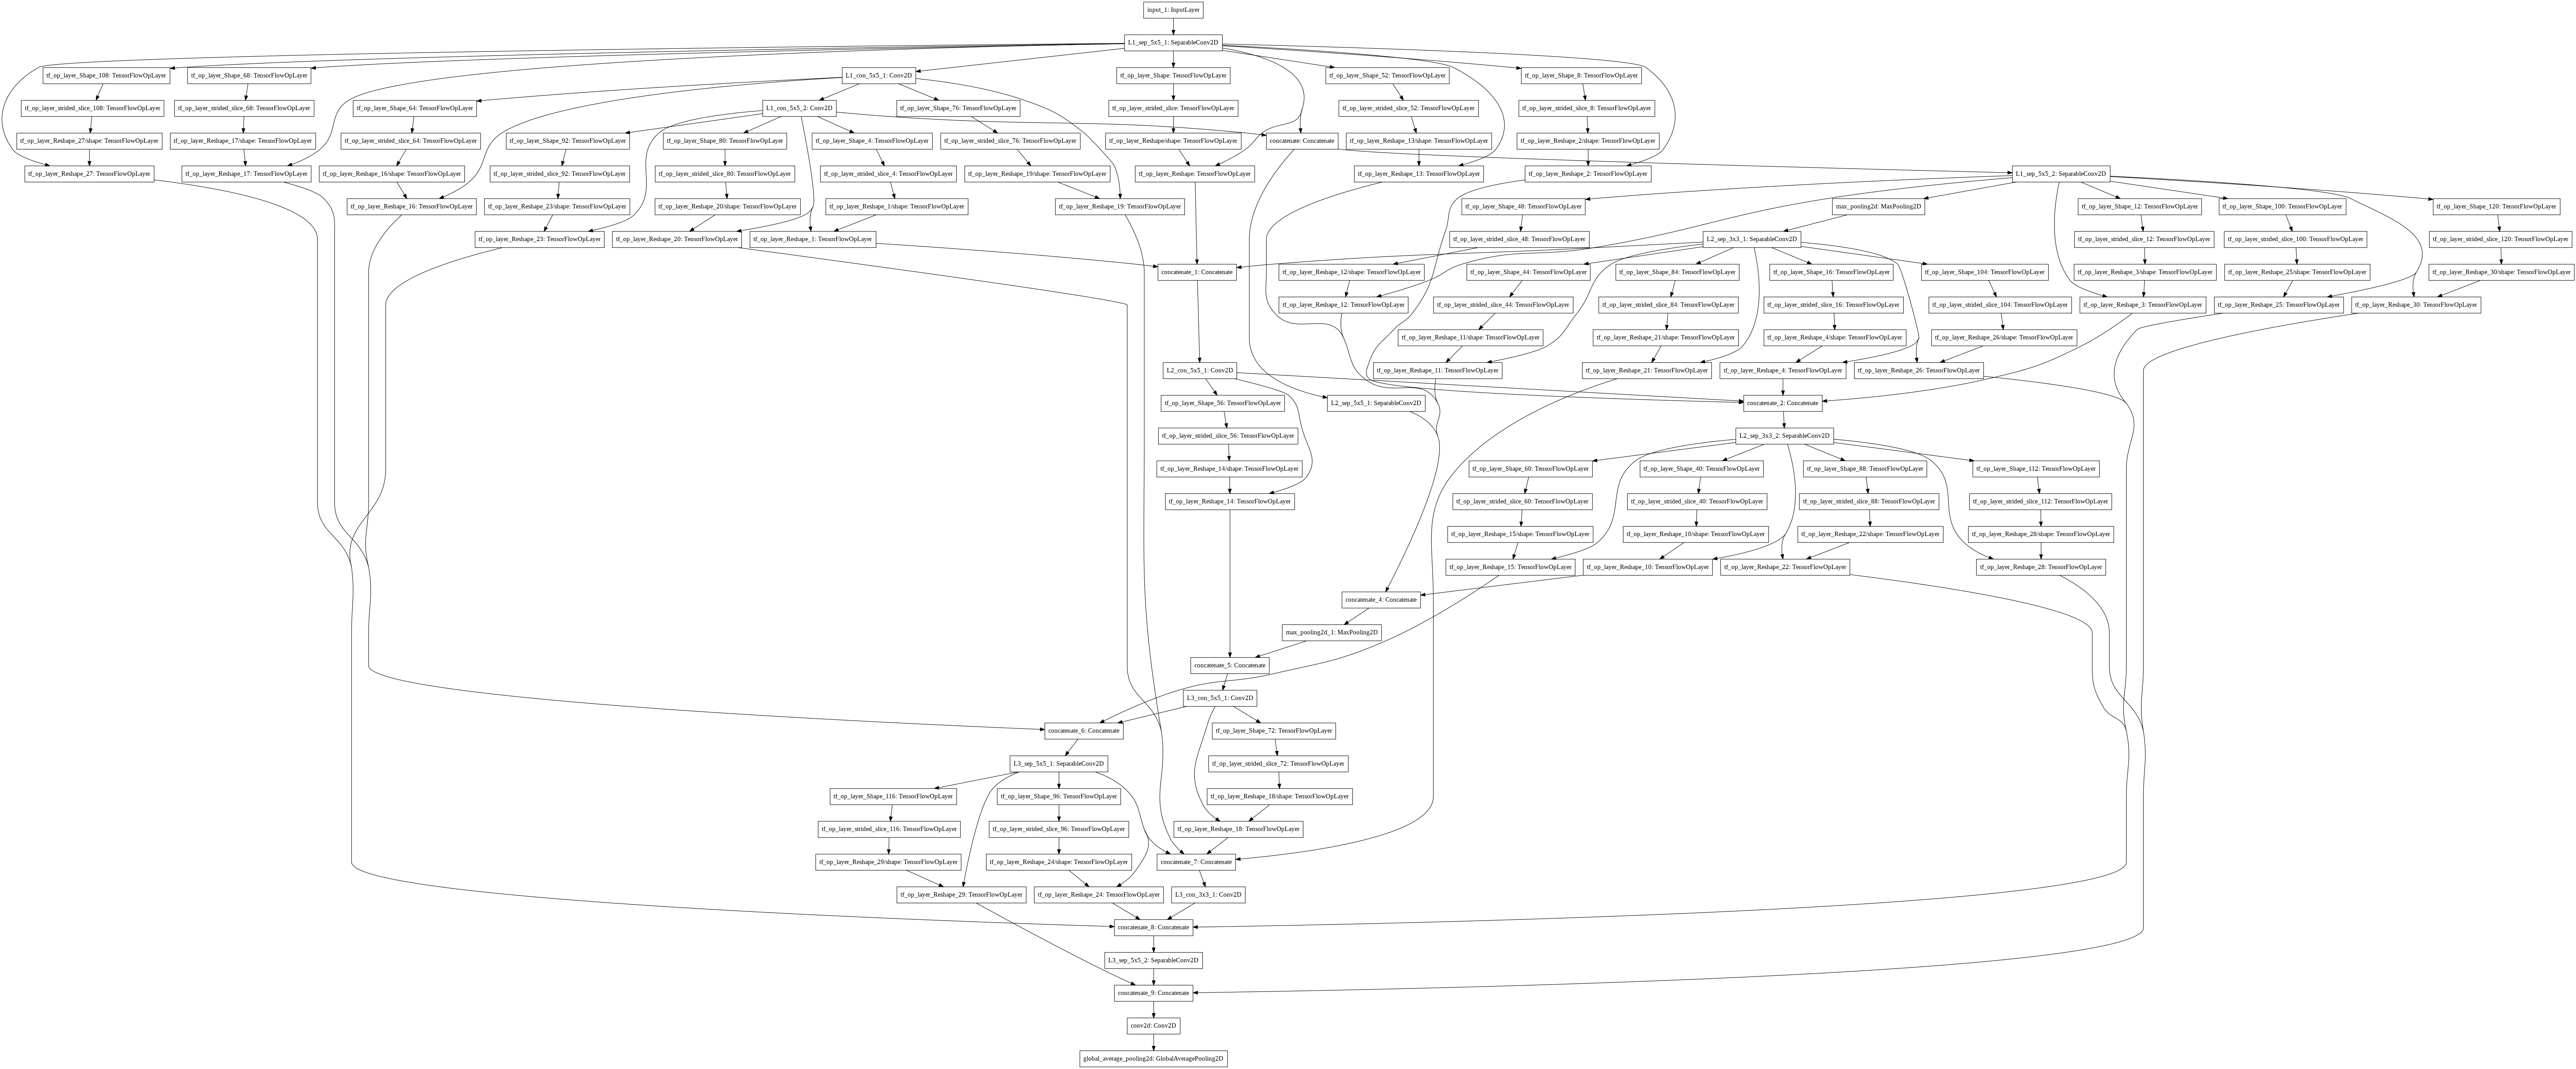

In [0]:
#input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.00001)
#inputs,outputs
#enasModel()
  'L : layer, sep : seperable, con : normal convolution '
modelInput = Input(shape=(32,32,3))
L1_sep_5x5_1 =     SeparableConv2D(32, 5, activation='relu',padding='same',name = "L1_sep_5x5_1",use_bias=False)(modelInput)
L1_con_5x5_1 =     Conv2D(32,5,activation='relu',padding='same',name = "L1_con_5x5_1",use_bias=False)(L1_sep_5x5_1)
L1_con_5x5_2 =     Conv2D(32,5,activation='relu',padding='same',name = "L1_con_5x5_2",use_bias=False)(L1_con_5x5_1)
L1_Merge_sep_con = concatenate([L1_sep_5x5_1, L1_con_5x5_2])
L1_sep_5x5_2 =     SeparableConv2D(32, 5, activation='relu',padding='same',name = "L1_sep_5x5_2",use_bias=False)(L1_Merge_sep_con)
Pool_1 =           MaxPooling2D(pool_size=(2, 2))(L1_sep_5x5_2)
#Layer 2
L2_sep_3x3_1 =     SeparableConv2D(32, 3, activation='relu',padding='same',name = "L2_sep_3x3_1",use_bias=False)(Pool_1)

L2_Merge_sep_5_3 = LayerResize(L2_sep_3x3_1,[L1_sep_5x5_1,L1_con_5x5_2])
L2_con_5x5_1 =     Conv2D(32,5,activation='relu',padding='same',name = "L2_con_5x5_1",use_bias=False)(L2_Merge_sep_5_3)

L2_Merge_sep_5_3_2 = LayerResize(L2_con_5x5_1,[L1_sep_5x5_1,L1_sep_5x5_2,L2_sep_3x3_1])
L2_sep_3x3_2 =     SeparableConv2D(32, 3, activation='relu',padding='same',name = "L2_sep_3x3_2",use_bias=False)(L2_Merge_sep_5_3_2)

L2_Merge_sep_5_3_3 = LayerResize(L2_sep_3x3_2,[L2_sep_3x3_1,L1_sep_5x5_1,L1_sep_5x5_2,L2_con_5x5_1,L1_sep_5x5_2])
L2_sep_5x5_1 =     SeparableConv2D(32, 5, activation='relu',padding='same',name = "L2_sep_5x5_1",use_bias=False)(L1_Merge_sep_con)

L2_Merge_sep_5_3_4 = LayerResize(L2_sep_5x5_1,[L2_sep_3x3_2,L2_sep_3x3_1,L1_sep_5x5_2,L1_sep_5x5_1])
Pool_2 =           MaxPooling2D(pool_size=(2, 2))(L2_Merge_sep_5_3_4)

#Layer3
L3_Merge_sep_5_3_1 = LayerResize(Pool_2,[L2_con_5x5_1])
L3_con_5x5_1 =     Conv2D(32,5,activation='relu',padding='same',name = "L3_con_5x5_1",use_bias=False)(L3_Merge_sep_5_3_1)

L3_Merge_sep_5_3_2 = LayerResize(L3_con_5x5_1,[L2_sep_3x3_2,L1_con_5x5_1,L1_sep_5x5_1])
L3_sep_5x5_1 =     SeparableConv2D(32, 5, activation='relu',padding='same',name = "L3_sep_5x5_1",use_bias=False)(L3_Merge_sep_5_3_2)

L3_Merge_sep_5_3_3 = LayerResize(L3_sep_5x5_1,[L3_con_5x5_1,L1_con_5x5_1,L1_con_5x5_2,L2_sep_3x3_1])
L3_con_3x3_1 =     Conv2D(32,3,activation='relu',padding='same',name = "L3_con_3x3_1",use_bias=False)(L3_Merge_sep_5_3_3)

L3_Merge_sep_5_3_4 = LayerResize(L3_con_3x3_1,[L2_sep_3x3_2,L1_con_5x5_2,L3_sep_5x5_1,L1_sep_5x5_2,L2_sep_3x3_1,L1_sep_5x5_1])
L3_sep_5x5_2 =     SeparableConv2D(32, 5, activation='relu',padding='same',name = "L3_sep_5x5_2",use_bias=False)(L3_Merge_sep_5_3_4)

L3_Merge_sep_5_3_5 = LayerResize(L3_sep_5x5_2,[L2_sep_3x3_2,L3_sep_5x5_1,L1_sep_5x5_2])
L3_con_1x1_10 = Conv2D(10, (1, 1), activation='softmax', use_bias=False)(L3_Merge_sep_5_3_5)
SoftMaxOutput = GlobalAveragePooling2D()(L3_con_1x1_10)

model = Model(inputs=modelInput, outputs=SoftMaxOutput)
# Compile the model
#(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
  # summarize layers
model.summary()
  # plot graph
plot_model(model)#, to_file='convolutional_neural_network.png')


Model is taking a long time to train and hence before reaching 100 times it stops. Have to change the model to reduce the training time

In [0]:
#changed in tensorflor 2.0
#from keras.optimizers import Adam
#from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.3 * 1/(1 + 0.319 * epoch), 10)

#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
#modelparams = model.fit_generator(X_train_iterator, steps_per_epoch=len(X_train_iterator), epochs=10, verbose=1, validation_data=(X_test_iterator),validation_steps=len(X_test_iterator))
#callbacks=[model_checkpoint],
# Train the model
model_info = model.fit_generator(imagenormalize.flow(x_train, y_train, batch_size = 1024),
                                 steps_per_epoch = y_train.shape[0], epochs = 100,
                                 validation_data = (x_test, y_test), verbose=1)

datagen.flow(train_features, train_labels, batch_size = 128),
training_accuracy = modelparams.history['acc']
test_accuracy = modelparams.history['val_acc']
# Create count of the number of epochs
epoch_count = range(1, 41)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

# fit model with generator
#model.fit_generator(X_train_iterator, steps_per_epoch=len(X_train_iterator), epochs=5)
#model.fit(X_train_iterator, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Epoch 1/100
   76/50000 [..............................] - ETA: 537:55:45 - loss: 1.6557 - accuracy: 0.3859